In [1]:
'''Random Forest Classifier'''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [5]:
# Split the data into a training set and a test set
x, y = make_moons(n_samples=1000, noise=0.25)
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train.shape

(750, 2)

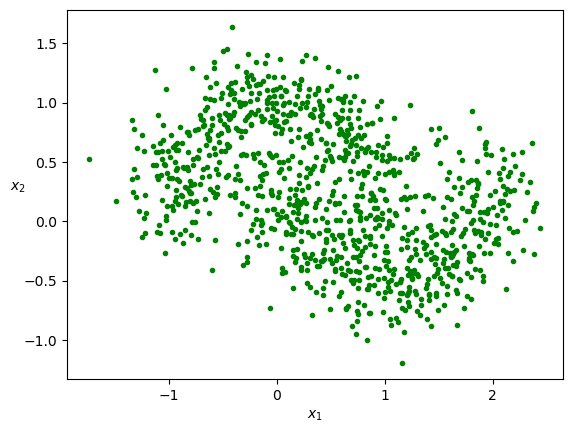

In [6]:
plt.plot(x[:,0],x[:,1],'.g')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$",rotation=0)
plt.show()

In [7]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(
    n_estimators=510,max_leaf_nodes=16,n_jobs=-1
)
random_forest_clf.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=510, n_jobs=-1)

In [12]:
y_pred_forest = random_forest_clf.predict(
    x_test
)

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features='auto',
                          max_leaf_nodes=16),
                          n_estimators=500,
    n_jobs=-1
)
bagging_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_features='auto',
                                                   max_leaf_nodes=16),
                  n_estimators=500, n_jobs=-1)

In [13]:
y_pred_bagging = bagging_clf.predict(x_test)

In [14]:
"""Check if predicted classes from bagging is same as 
classes from random forest """
np.all(y_pred_bagging==y_pred_forest)

True

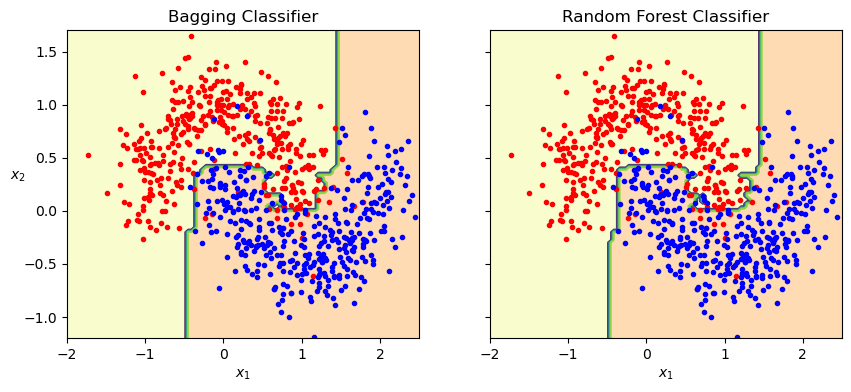

In [18]:
def decision_boundary_plot(clf,x,y,alpha=1.0):
    axes=[-2, 2.5, -1.2, 1.7]
    x1,x2 = np.meshgrid(np.linspace(axes[0],
                                   axes[1],120),
    np.linspace(axes[2],axes[3],120))
    x_topredict = np.c_[x1.ravel(),x2.ravel()]
    y_predicted = clf.predict(x_topredict).reshape(x1.shape)
    plt.contourf(x1,x2,y_predicted,alpha=0.3 * alpha,cmap='Wistia')
    plt.contour(x1,x2,y_predicted,alpha=0.8 * alpha)
    for idx,style in (zip((0,1),('r.','b.'))):
        plt.plot(x[:,0][y==idx],x[:,1][y==idx],style)
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(ax[0])
decision_boundary_plot(bagging_clf,x_train,y_train)
plt.title("Bagging Classifier")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$", rotation=0)
plt.sca(ax[1])
decision_boundary_plot(random_forest_clf,x_train,y_train)
plt.title("Random Forest Classifier")
plt.xlabel(r"$x_1$")
plt.show()

In [ ]:
"""Conclusion
A random  forest classifier is a bagging
classifier with descision trees.
Thus the plots are identical!!!"""

In [38]:
# measure the relative importance of each feature
df = pd.DataFrame(x,columns=('x1','x2'))
df.sample(3)

,x1,x2
471,0.944644,-0.028649
258,-1.089206,-0.031402
826,0.741341,0.584126


In [37]:
# measure the relative importance of each feature
for score,feature_name in zip(
    random_forest_clf.feature_importances_,df.columns):
    print(',feature_name,score)

x1 0.4356593240039752
x2 0.5643406759960248
